<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/kaggle_submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the train and test sets 
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test =  pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
## making temporary datasets for filling and categorical transformations

#getting rid of the ID attribute as we wont be needing this 
df_train_temp = df_train.drop("Id",axis=1)
df_test_temp =  df_test      #.drop("Id",axis=1)

#Handling Missing Values

In [ ]:
## dropping the colums with excess loss of data 

# for the train data-set 
df_train_temp.drop(["Alley","PoolQC","MiscFeature"], axis=1,inplace=True)
#for the test data set 
df_test_temp.drop(["Alley","PoolQC","MiscFeature"],axis=1,inplace=True)

# function for imputing the missing numerical data 
# we have used the modes for imputing the missing numerical data 
features = ["LotFrontage","MasVnrArea","GarageYrBlt"]
for label in features:
   df_train_temp[label].fillna(df_train_temp[label].mode()[0],inplace=True)


In [ ]:
# checking for missing numerical features :

for label , content in df_train_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_train_temp[label].isna().sum()>0)):
    print(label)

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
## checking for the data set 
missing_numerical_features = ["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea"]
for label in missing_numerical_features:
  print(df_test_temp[label].isna().sum())

227
15
1
1
1
1
2
2
78
1
1


(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

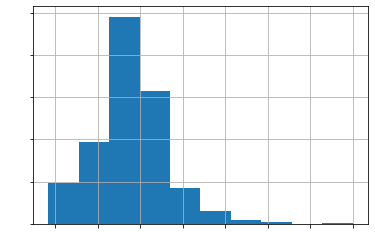

In [ ]:
df_test_temp["LotFrontage"].hist()
plt.xticks(color='white')
plt.yticks(color='white')

In [ ]:
# function for imputing the missing numerical data 
# we have used the modes for imputing the missing numerical data 
features = ["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageYrBlt","GarageCars","GarageArea"]
for label in features:
   df_test_temp[label].fillna(df_test_temp[label].mode()[0],inplace=True)

#for the test data set :
#checking for missing numerical columns :
for label , content in df_test_temp.items():
  if (pd.api.types.is_numeric_dtype(content) & (df_test_temp[label].isna().sum()>0)):
    print(label)

In [ ]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Thus the numerical features of both the train and test data sets have been taken care of 

Now for the string objects 

In [ ]:
# checking for string data-objects in the train data with missing values:
for  label , content in df_train_temp.items():
   if (pd.api.types.is_string_dtype(content) & (df_train_temp[label].isna().sum()>0)) :
     print(label)

MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
Fence


In [ ]:
#handling the features (filling)
missing_string_features = ["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","Fence"]
for label in missing_string_features:
  df_train_temp[label].fillna(df_train_temp[label].mode()[0],inplace=True)
  

In [ ]:
#checking for the test data :
# checking for string data-objects in the train data 
for  label , content in df_test_temp.items():
   if (pd.api.types.is_string_dtype(content) & (df_test_temp[label].isna().sum()>0)) :
     df_test_temp[label].fillna(df_test_temp[label].mode()[0],inplace=True)

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Thus the data is not rid of missing values :)


#handling string objects and turning them into numerical data types:
* we will turn the strings into categories 
* then turn the categories into codes

In [ ]:
# changing the sting objects to category objects in the train dat set 
for label , content in df_train_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_train_temp[label] = df_train_temp[label].astype('category')

#changing the category into codes:

for label , content in df_train_temp.items():
  if pd.api.types.is_categorical_dtype(content):
    df_train_temp[label] = pd.Categorical(content).codes

In [ ]:
df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
#doing the same for the test data 
# changing the sting objects to category objects in the train dat set 
for label , content in df_test_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_test_temp[label] = df_test_temp[label].astype('category')
#changing the category into codes:

for label , content in df_test_temp.items():
  if pd.api.types.is_categorical_dtype(content):
    df_test_temp[label] = pd.Categorical(content).codes

In [ ]:
df_train_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,2,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,2,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,2,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,2,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,2,0,12,2008,8,4,250000


In [ ]:
df_test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

splitting the train data into train and test sets 

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
train,test = train_test_split(df_train_temp, test_size=0.2)

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,20,3,70.0,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1957,1,1,8,8,2,0.0,3,2,1,3,3,3,4,922,5,0,392,1314,1,4,1,4,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,2,1,1957.0,1,1,294,4,4,2,250,0,0,0,0,0,2,0,6,2010,8,4,145000
1066,60,3,59.0,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1993,1994,1,1,12,13,2,0.0,2,4,2,2,3,3,5,0,5,0,799,799,1,2,1,4,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,4,1,1993.0,1,2,380,4,4,2,0,40,0,0,0,0,2,0,5,2009,8,4,178000
638,30,3,67.0,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1910,1950,1,1,8,14,2,0.0,3,4,1,1,3,3,5,0,5,0,796,796,1,2,1,0,796,0,0,796,0,0,1,0,2,1,3,4,6,0,2,1,2005.0,2,0,0,4,4,1,328,0,164,0,0,0,2,0,5,2008,8,4,85000
799,50,3,60.0,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1937,1950,1,1,13,14,1,252.0,3,4,0,2,3,3,0,569,5,0,162,731,1,0,1,4,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,4,5,1939.0,2,1,240,4,4,2,0,0,264,0,0,0,2,0,6,2007,8,4,175000
380,50,3,50.0,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1924,1950,1,1,3,14,2,0.0,3,4,0,3,3,3,3,218,5,0,808,1026,1,4,1,4,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,2,5,1924.0,2,1,308,4,4,2,0,0,242,0,0,0,2,0,5,2010,8,4,127000


In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,20,3,70.0,8414,1,3,3,0,4,0,19,2,2,0,2,6,8,1963,2003,3,1,6,6,2,0.0,3,4,1,3,3,3,2,663,5,0,396,1059,1,4,1,4,1068,0,0,1068,0,1,1,0,3,1,3,6,6,0,2,1,1963.0,1,1,264,4,4,2,192,0,0,0,0,0,2,0,2,2006,8,4,154500
1105,60,3,98.0,12256,1,0,3,0,0,0,15,2,2,0,5,8,5,1994,1995,1,1,6,6,1,362.0,2,4,2,0,3,0,2,1032,5,0,431,1463,1,0,1,4,1500,1122,0,2622,1,0,2,1,3,1,2,9,6,2,4,1,1994.0,1,2,712,4,4,2,186,32,0,0,0,0,2,0,4,2010,8,4,325000
413,30,4,56.0,8960,1,3,3,0,4,0,17,0,2,0,2,5,6,1927,1950,1,1,14,15,2,0.0,3,4,1,3,3,3,5,0,5,0,1008,1008,1,2,1,0,1028,0,0,1028,0,0,1,0,2,1,3,5,6,1,2,5,1927.0,2,2,360,4,4,2,0,0,130,0,0,0,2,0,3,2010,8,4,115000
522,50,4,50.0,5000,1,3,3,0,0,0,3,1,2,0,0,6,7,1947,1950,1,1,5,5,2,0.0,3,2,1,3,3,3,0,399,5,0,605,1004,1,0,1,4,1004,660,0,1664,0,0,2,0,3,1,3,7,6,2,2,5,1950.0,2,2,420,4,4,2,0,24,36,0,0,0,2,0,10,2006,8,4,159000
1036,20,3,89.0,12898,1,0,1,0,4,0,23,2,2,0,2,9,5,2007,2008,3,1,12,13,3,70.0,2,4,2,0,3,1,2,1022,5,0,598,1620,1,0,1,4,1620,0,0,1620,1,0,2,0,2,1,0,6,6,1,0,1,2008.0,0,3,912,4,4,2,228,0,0,0,0,0,2,0,9,2009,8,4,315500


In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,20,3,70.0,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1957,1,1,8,8,2,0.0,3,2,1,3,3,3,4,922,5,0,392,1314,1,4,1,4,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,2,1,1957.0,1,1,294,4,4,2,250,0,0,0,0,0,2,0,6,2010,8,4,145000
1066,60,3,59.0,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1993,1994,1,1,12,13,2,0.0,2,4,2,2,3,3,5,0,5,0,799,799,1,2,1,4,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,4,1,1993.0,1,2,380,4,4,2,0,40,0,0,0,0,2,0,5,2009,8,4,178000
638,30,3,67.0,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1910,1950,1,1,8,14,2,0.0,3,4,1,1,3,3,5,0,5,0,796,796,1,2,1,0,796,0,0,796,0,0,1,0,2,1,3,4,6,0,2,1,2005.0,2,0,0,4,4,1,328,0,164,0,0,0,2,0,5,2008,8,4,85000
799,50,3,60.0,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1937,1950,1,1,13,14,1,252.0,3,4,0,2,3,3,0,569,5,0,162,731,1,0,1,4,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,4,5,1939.0,2,1,240,4,4,2,0,0,264,0,0,0,2,0,6,2007,8,4,175000
380,50,3,50.0,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1924,1950,1,1,3,14,2,0.0,3,4,0,3,3,3,3,218,5,0,808,1026,1,4,1,4,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,2,5,1924.0,2,1,308,4,4,2,0,0,242,0,0,0,2,0,5,2010,8,4,127000


In [ ]:
x_train = train.drop("SalePrice",axis=1)
y_train = train["SalePrice"]
x_test = test.drop("SalePrice",axis=1)
y_test = test["SalePrice"]

#EDA

In [ ]:
#exploring the x_train set 
x_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.849315,3.033390,68.422089,10689.642123,0.996575,1.917808,2.794521,0.000856,2.959760,0.059075,12.238014,2.028253,2.008562,0.478596,3.050514,6.121575,5.584760,1970.965753,1984.897260,1.420377,1.067637,9.674658,10.455479,1.755137,103.238870,2.541096,3.718322,1.403253,2.279110,2.804795,2.294521,2.779110,446.023973,4.725171,45.152397,570.595034,1061.771404,1.041096,1.560788,0.928938,3.696918,1169.354452,352.351027,5.696062,1527.401541,0.425514,0.057363,1.577055,0.381849,2.890411,1.047945,2.345034,6.561644,5.743151,0.618151,2.386130,2.208048,1980.105308,1.221747,1.781678,476.273973,3.873288,3.904110,1.853596,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,1.882705,51.267123,6.356164,2007.818493,7.497432,3.782534
std,42.531862,0.609619,22.821030,10759.366198,0.058445,1.414247,0.685687,0.029260,1.651545,0.266566,5.972648,0.874306,0.244764,1.178741,1.907461,1.367619,1.116062,30.675495,20.733955,0.843644,0.564333,3.199771,3.531434,0.623703,172.746354,0.695208,0.752219,0.728339,0.865907,0.672315,1.133234,1.842331,459.070977,0.911123,158.217499,446.364551,440.676330,0.320704,1.741102,0.257038,1.024427,386.675268,439.570872,47.887106,524.432686,0.519969,0.236289,0.546912,0.499953,0.804855,0.225448,0.822744,1.619706,0.974809,0.645129,0.907389,1.757453,24.777848,0.813114,0.740161,211.095373,0.590736,0.511446,0.500184,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,0.452481,553.039684,2.670707,1.322639,1.587762,1.078243
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000
25%,20.000000,3.000000,60.000000,7587.250000,1.000000,0.000000,3.000000,0.000000,1.000000,0.0000

In [ ]:
df_train_temp.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,68.267123,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,1.762329,103.117123,2.539726,3.733562,1.396575,2.280137,2.817123,2.284247,2.789726,443.639726,4.715753,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,3.682192,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,2.386986,2.208219,1979.976027,1.228767,1.767123,472.980137,3.871918,3.905479,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,1.889726,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.356355,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.614274,180.731373,0.693995,0.731807,0.722394,0.864510,0.650919,1.138472,1.837550,456.098091,0.925252,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,1.051301,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,0.900214,1.759864,24.749688,0.811835,0.747315,213.804841,0.594151,0.508297,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.440610,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,75

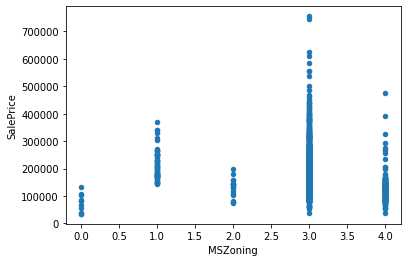

In [ ]:
df_train_temp.plot(kind="scatter",x="MSZoning",y="SalePrice")

choosing the features 
we wil be taking a look at the correlation matrix

In [ ]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)[:20]

SalePrice       1.000000
OverallQual     0.785555
GrLivArea       0.695652
GarageCars      0.640991
GarageArea      0.624139
TotalBsmtSF     0.597766
1stFlrSF        0.587883
FullBath        0.552546
TotRmsAbvGrd    0.520388
YearBuilt       0.516501
YearRemodAdd    0.508593
MasVnrArea      0.457608
Fireplaces      0.457549
GarageYrBlt     0.389268
Foundation      0.367775
BsmtFinSF1      0.359460
WoodDeckSF      0.329843
2ndFlrSF        0.314030
LotFrontage     0.308009
OpenPorchSF     0.299969
Name: SalePrice, dtype: float64

In [ ]:
corr_matrix["SalePrice"].sort_values(ascending = False).tail(20)

MiscVal         -0.020179
SaleType        -0.033214
LotConfig       -0.041717
BsmtHalfBath    -0.048346
BsmtFinType1    -0.070653
OverallCond     -0.074391
BldgType        -0.080817
MSSubClass      -0.088081
Heating         -0.106752
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
MSZoning        -0.195789
LotShape        -0.235512
GarageType      -0.293417
BsmtExposure    -0.306649
HeatingQC       -0.413112
GarageFinish    -0.534312
KitchenQual     -0.589030
BsmtQual        -0.612889
ExterQual       -0.618309
Name: SalePrice, dtype: float64

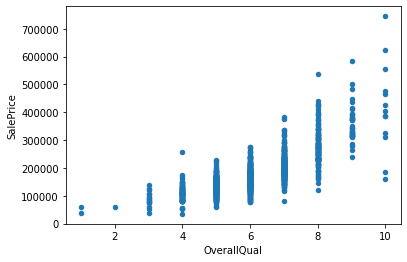

In [ ]:
train.plot(kind="scatter",x="OverallQual",y="SalePrice")

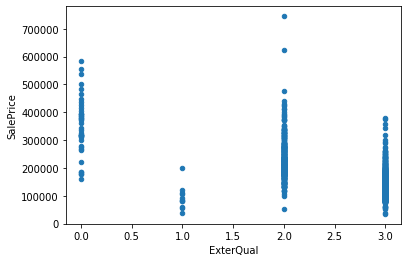

In [ ]:
train.plot(kind="scatter",x="ExterQual",y="SalePrice")

In [ ]:
train_scaled

NameError: ignored

In [ ]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,20,3,70.0,8400,1,3,3,0,4,0,12,2,2,0,2,5,6,1957,1957,1,1,8,8,2,0.0,3,2,1,3,3,3,4,922,5,0,392,1314,1,4,1,4,1314,0,0,1314,1,0,1,0,3,1,3,5,6,0,2,1,1957.0,1,1,294,4,4,2,250,0,0,0,0,0,2,0,6,2010,8,4,145000
1066,60,3,59.0,7837,1,0,3,0,4,0,8,2,2,0,5,6,7,1993,1994,1,1,12,13,2,0.0,2,4,2,2,3,3,5,0,5,0,799,799,1,2,1,4,799,772,0,1571,0,0,2,1,3,1,3,7,6,1,4,1,1993.0,1,2,380,4,4,2,0,40,0,0,0,0,2,0,5,2009,8,4,178000
638,30,3,67.0,8777,1,3,3,0,4,0,7,1,2,0,2,5,7,1910,1950,1,1,8,14,2,0.0,3,4,1,1,3,3,5,0,5,0,796,796,1,2,1,0,796,0,0,796,0,0,1,0,2,1,3,4,6,0,2,1,2005.0,2,0,0,4,4,1,328,0,164,0,0,0,2,0,5,2008,8,4,85000
799,50,3,60.0,7200,1,3,3,0,0,0,18,1,2,0,0,5,7,1937,1950,1,1,13,14,1,252.0,3,4,0,2,3,3,0,569,5,0,162,731,1,0,1,4,981,787,0,1768,1,0,1,1,3,1,2,7,6,2,4,5,1939.0,2,1,240,4,4,2,0,0,264,0,0,0,2,0,6,2007,8,4,175000
380,50,3,50.0,5000,1,3,3,0,4,0,18,2,2,0,0,5,6,1924,1950,1,1,3,14,2,0.0,3,4,0,3,3,3,3,218,5,0,808,1026,1,4,1,4,1026,665,0,1691,0,0,2,0,3,1,2,6,6,1,2,5,1924.0,2,1,308,4,4,2,0,0,242,0,0,0,2,0,5,2010,8,4,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,3,78.0,9317,1,0,3,0,4,0,5,2,2,0,2,6,5,2006,2006,1,1,12,13,2,0.0,2,4,2,2,3,3,2,24,5,0,1290,1314,1,2,1,4,1314,0,0,1314,0,0,2,0,3,1,2,6,6,1,2,1,2006.0,1,2,440,4,4,2,0,22,0,0,0,0,2,0,3,2007,8,4,176432
1130,50,3,65.0,7804,1,3,3,0,4,0,18,2,2,0,0,4,3,1928,1950,1,1,14,10,2,0.0,3,4,0,3,3,3,1,622,5,0,500,1122,1,4,1,4,1328,653,0,1981,1,0,2,0,4,1,2,7,3,2,4,5,1981.0,2,2,576,4,4,2,431,44,0,0,0,0,2,0,12,2009,8,4,135000
1294,20,3,60.0,8172,1,3,3,0,4,0,7,2,2,0,2,5,7,1955,1990,3,1,14,10,2,0.0,3,4,1,3,3,3,4,167,5,0,697,864,1,4,1,4,864,0,0,864,1,0,1,0,2,1,3,5,6,0,2,5,1957.0,2,2,572,4,4,0,0,0,0,0,0,0,2,0,4,2006,8,4,115000
860,50,3,55.0,7642,1,3,3,0,0,0,6,2,2,0,0,7,8,1918,1998,1,1,13,14,2,0.0,2,4,0,3,3,3,5,0,5,0,912,912,1,2,1,4,912,514,0,1426,0,0,1,1,3,1,2,7,6,1,2,5,1925.0,2,1,216,4,4,2,0,240,0,0,0,0,0,0,6,2007,8,4,189950


In [ ]:
# scaling the train data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
pd.DataFrame(train_scaled,columns=train.columns)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.75,0.167808,0.033186,1.0,1.0,1.0,0.0,1.0,0.0,0.500000,0.250,0.285714,0.0,0.285714,0.444444,0.625,0.615942,0.116667,0.2,0.142857,0.571429,0.533333,0.666667,0.000000,1.000000,0.5,0.2,1.000000,1.0,1.0,0.8,0.163359,1.0,0.0,0.167808,0.215057,0.2,1.0,1.0,1.0,0.224874,0.000000,0.0,0.184627,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.250000,1.0,0.000000,0.5,0.2,0.518182,0.5,0.25,0.207334,1.0,1.0,1.0,0.291715,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.0,0.454545,1.00,1.0,0.8,0.155049
1,0.235294,0.75,0.130137,0.030555,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.250,0.285714,0.0,0.714286,0.555556,0.750,0.876812,0.733333,0.2,0.142857,0.857143,0.866667,0.666667,0.000000,0.666667,1.0,0.4,0.666667,1.0,1.0,1.0,0.000000,1.0,0.0,0.342038,0.130769,0.2,0.5,1.0,1.0,0.106700,0.373850,0.0,0.233044,0.000000,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.416667,1.0,0.333333,1.0,0.2,0.845455,0.5,0.50,0.267983,1.0,1.0,1.0,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.666667,0.0,0.363636,0.75,1.0,0.8,0.201521
2,0.058824,0.75,0.157534,0.034948,1.0,1.0,1.0,0.0,1.0,0.0,0.291667,0.125,0.285714,0.0,0.285714,0.444444,0.750,0.275362,0.000000,0.2,0.142857,0.571429,0.933333,0.666667,0.000000,1.000000,1.0,0.2,0.333333,1.0,1.0,1.0,0.000000,1.0,0.0,0.340753,0.130278,0.2,0.5,1.0,0.0,0.106012,0.000000,0.0,0.087038,0.000000,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.166667,1.0,0.000000,0.5,0.2,0.954545,1.0,0.00,0.000000,1.0,1.0,0.5,0.382730,0.000000,0.297101,0.0,0.0,0.0,0.666667,0.0,0.363636,0.50,1.0,0.8,0.070553
3,0.176471,0.75,0.133562,0.027577,1.0,1.0,1.0,0.0,0.0,0.0,0.750000,0.125,0.285714,0.0,0.000000,0.444444,0.750,0.471014,0.000000,0.2,0.142857,0.928571,0.933333,0.333333,0.182874,1.000000,1.0,0.0,0.666667,1.0,1.0,0.0,0.100815,1.0,0.0,0.069349,0.119640,0.2,0.0,1.0,1.0,0.148463,0.381114,0.0,0.270158,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.666667,1.0,1.0,0.354545,1.0,0.25,0.169252,1.0,1.0,1.0,0.000000,0.000000,0.478261,0.0,0.0,0.0,0.666667,0.0,0.454545,0.25,1.0,0.8,0.197296
4,0.176471,0.75,0.099315,0.017294,1.0,1.0,1.0,0.0,1.0,0.0,0.750000,0.250,0.285714,0.0,0.000000,0.444444,0.625,0.376812,0.000000,0.2,0.142857,0.214286,0.933333,0.666667,0.000000,1.000000,1.0,0.0,1.000000,1.0,1.0,0.6,0.038625,1.0,0.0,0.345890,0.167921,0.2,1.0,1.0,1.0,0.158788,0.322034,0.0,0.255652,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.5,1.0,0.218182,1.0,0.25,0.217207,1.0,1.0,1.0,0.000000,0.000000,0.438406,0.0,0.0,0.0,0.666667,0.0,0.363636,1.00,1.0,0.8,0.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.000000,0.75,0.195205,0.037472,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.285714,0.555556,0.500,0.971014,0.933333,0.2,0.142857,0.857143,0.866667,0.666667,0.000000,0.666667,1.0,0.4,0.666667,1.0,1.0,0.4,0.004252,1.0,0.0,0.552226,0.215057,0.2,0.5,1.0,1.0,0.224874,0.000000,0.0,0.184627,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.

In [ ]:
x_train = train.drop("SalePrice",axis=1)
y_train = train["SalePrice"]
x_test = test.drop("SalePrice",axis=1)
y_test = test["SalePrice"]

#Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_test,y_test)

0.8481446866635471

In [ ]:
y_preds_ridge= ridge.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error


#random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd =RandomForestRegressor(random_state=42)
rnd.fit(x_train,y_train)
rnd.score(x_test,y_test)

0.8963557869581504

In [ ]:
y_preds_rnd = rnd.predict(x_test)
mean_absolute_error(y_preds_rnd,y_test)

17614.141164383564

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [934],
           "criterion" : ["mae"]
           }

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [ ]:
rs_model.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 0.5,
 'max_samples': 934,
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 60}

In [ ]:
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(
                                    max_depth=10,
                                    n_estimators=50,
                                    min_samples_leaf=1,
                                    min_samples_split=16,
                                    max_features=0.5,
                                    criterion = 'mae',
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible


In [ ]:
ideal_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:

ideal_model.score(x_test,y_test)

0.8712919017046555

In [ ]:
y_preds_ideal = ideal_model.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_preds_ideal)

17027.127646326277


#Boosting

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(RandomForestRegressor(max_depth=None, criterion='mae'), 
                        n_estimators=100, random_state=42)

ada.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mae',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [ ]:
ada.score(x_test,y_test)

0.9078002201170421

In [ ]:
y_preds_ada = ada.predict(x_test)

In [ ]:
mean_absolute_error(y_preds_ada,y_test)

16190.566952054794

In [ ]:

submit = pd.DataFrame(ada.predict(df_test_temp.drop("Id",axis = 1)),index=df_test_temp["Id"])
submit.columns = ["predictions"]
submit["Id"]= df_test_temp["Id"]

In [ ]:
df_test_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,2,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,2,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,2,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,2,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,2,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,2,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,2,0,1,2010,8,4


In [ ]:
submit

,predictions,Id
Id,,
1461,124005.19,NaN
1462,154916.70,NaN
1463,181967.40,NaN
1464,186430.34,NaN
1465,203446.00,NaN
...,...,...
2915,91385.37,NaN
2916,92831.50,NaN
2917,162179.00,NaN


In [ ]:
submit.to_excel("submit.xlsx")

#Stochastic gradient descent 